In [1]:
import json
import os
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
import torch

/home/parinayok/.pyenv/versions/miniconda3-latest/envs/car/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path='results/vlpcook/base.json'
with open(path) as f:
    im2recipe_dict = json.load(f)

In [3]:
from random import choice, choices


img_dir = '/srv/datasets2/recipe1m+/raw_htmls'
scale_size = 256
crop_size = 224
transform = transforms.Compose([
            transforms.Resize(scale_size),
            # transforms.CenterCrop(crop_size),
            transforms.ToTensor(),
        ])
def get_img_from_id(recipe_id: str):
    site_map = recipe_id.split('_')[0]
    file_name = 'recipe-' + recipe_id.split('_')[1] + '.jpg'
    img_path = os.path.join(img_dir,site_map,file_name)
    img = Image.open(img_path).convert('RGB')
    img = transform(img)
    return img

# rand_recipe_ids = choices(list(im2recipe_dict.keys()),k=5)
plt.figure(dpi=200)
all_imgs = []
for recipe_id in rand_recipe_ids:
    imgs = []
    first_img = get_img_from_id(recipe_id)
    imgs.append(first_img)
    results = im2recipe_dict[recipe_id]
    for result in results[:5]:
        img = get_img_from_id(result)
        imgs.append(img)
    all_results_img = torch.cat(imgs,dim=2)
    all_imgs.append(all_results_img)
all_imgs_tensor = torch.cat(all_imgs,dim=1)
plt.xticks([])
plt.yticks([])
plt.imshow(all_imgs_tensor.permute(1,2,0))
print(rand_recipe_ids)

NameError: name 'rand_recipe_ids' is not defined

<Figure size 1280x960 with 0 Axes>

In [4]:
#show double results
path_ht='results/ht/base.json'
path_ours='results/deep_ht/direct_ingrs_3_branches/no_nutr/food_test_recipe_only.json'
with open(path_ht) as f:
    im2recipe_dict_ht = json.load(f)
with open(path_ours) as f:
    im2recipe_dict_ours = json.load(f)

In [5]:
with open('/srv/datasets2/recipe1m+/food.com_data_rescaled/nutr/food.com_nutr_g_per_recipe.json') as f:
    nutr_g_per_recipes = json.load(f)
with open('/srv/datasets2/recipe1m+/food.com_data_rescaled/nutr/simplified_food_ids_per_recipes.json') as f:
    food_ids_per_recipes = json.load(f)

['recipes-5_00014843', 'recipes-2_00013592']
ht
[['recipes-8_00011307', 'recipes-1_00008504', 'recipes-8_00001441', 'recipes-5_00007254', 'recipes-4_00013079', 'recipes-4_00001289', 'recipes-3_00009230', 'recipes-4_00014801', 'recipes-4_00009128', 'recipes-1_00011599', 'recipes-8_00002431', 'recipes-10_00002114', 'recipes-9_00005884', 'recipes-9_00006939', 'recipes-5_00003533', 'recipes-2_00008849', 'recipes-10_00002469', 'recipes-2_00012541', 'recipes-8_00002390', 'recipes-5_00006033'], ['recipes-6_00014829', 'recipes-10_00000706', 'recipes-2_00013646', 'recipes-10_00002306', 'recipes-4_00011334', 'recipes-3_00003620', 'recipes-6_00004122', 'recipes-7_00005542', 'recipes-1_00013072', 'recipes-6_00004664', 'recipes-8_00011952', 'recipes-4_00005319', 'recipes-7_00008334', 'recipes-8_00013709', 'recipes-7_00009568', 'recipes-7_00004546', 'recipes-8_00006174', 'recipes-4_00007660', 'recipes-9_00003445', 'recipes-1_00010166']]
ours
[['recipes-4_00014801', 'recipes-8_00011307', 'recipes-5_0

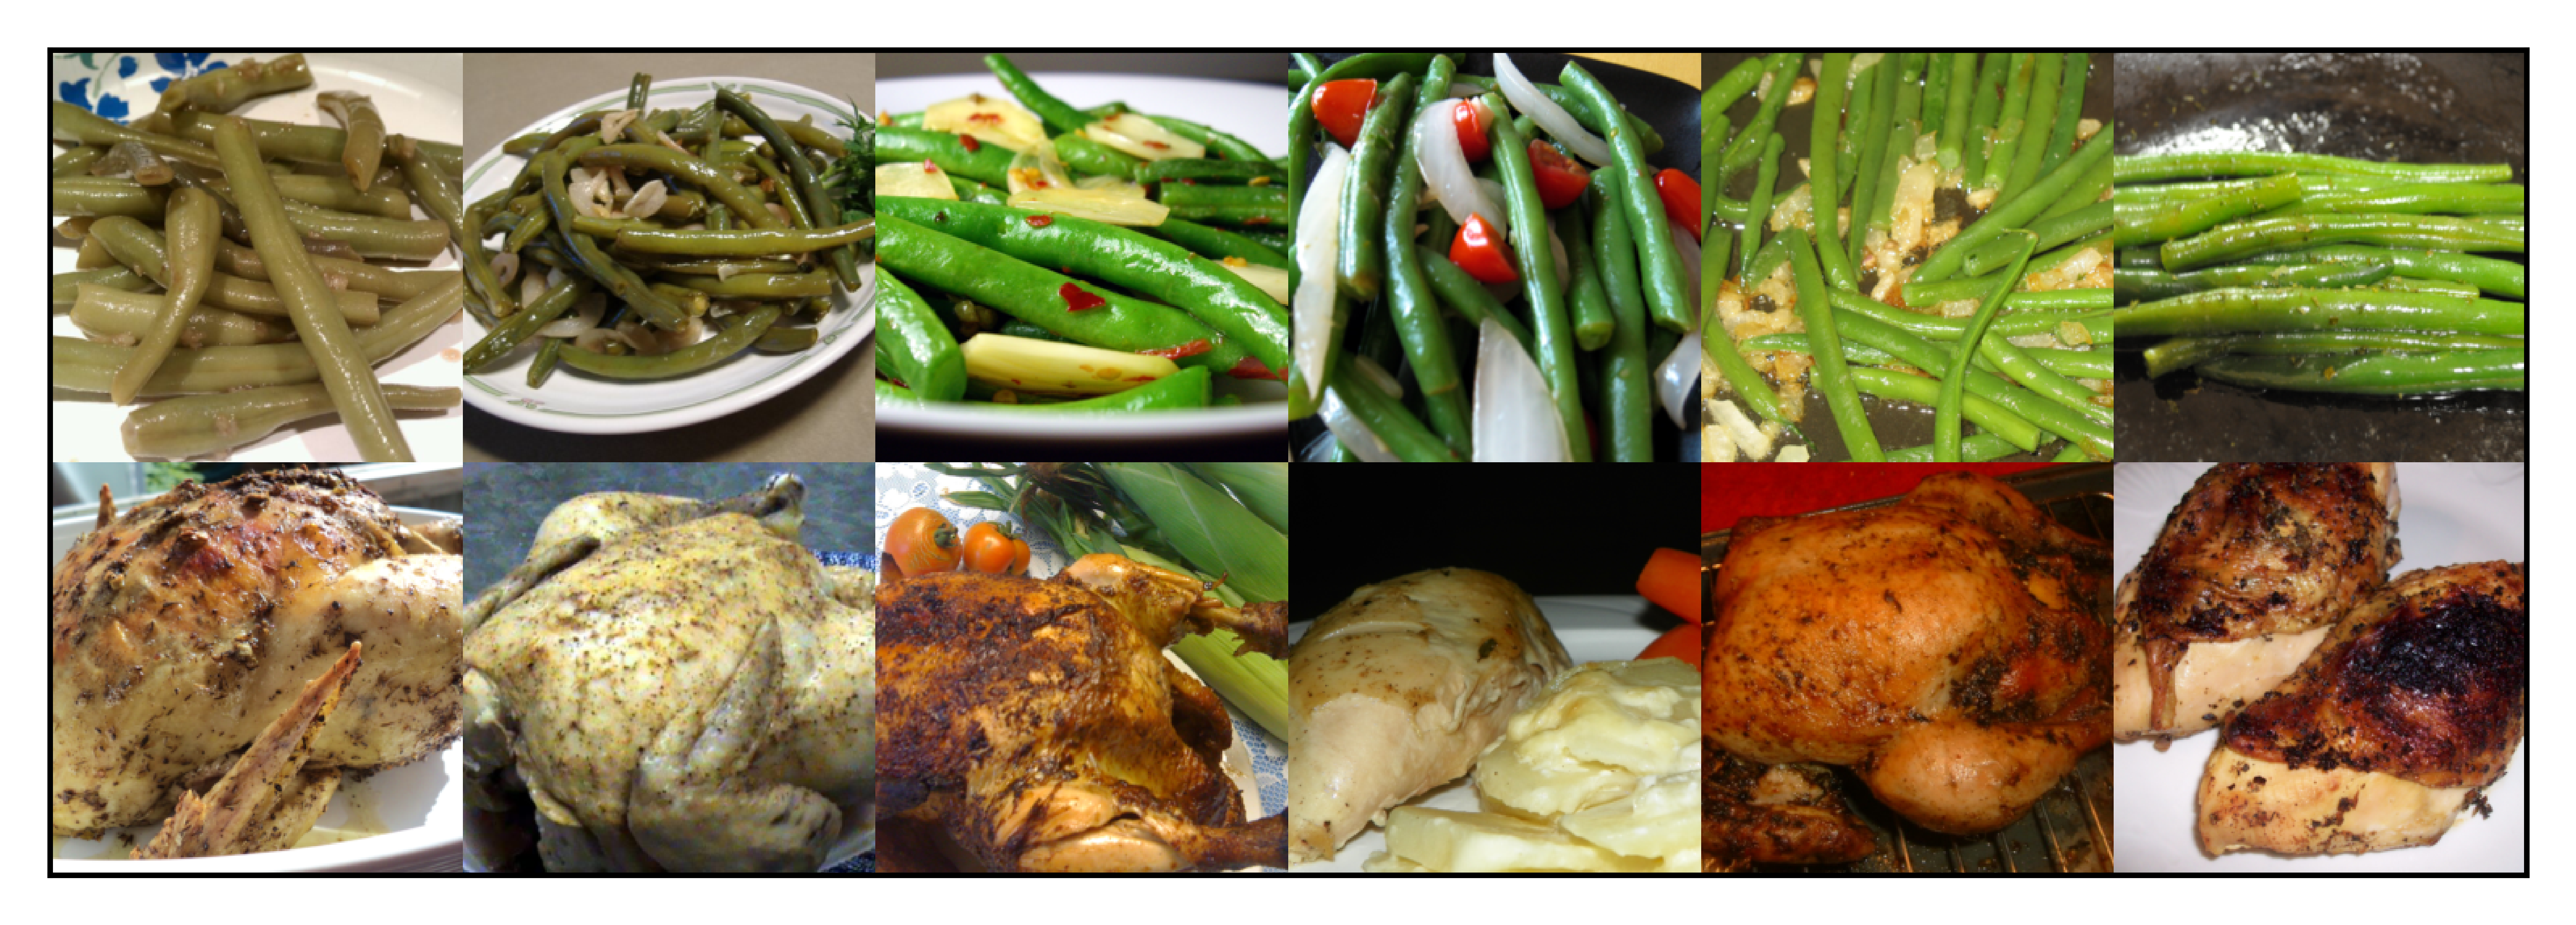

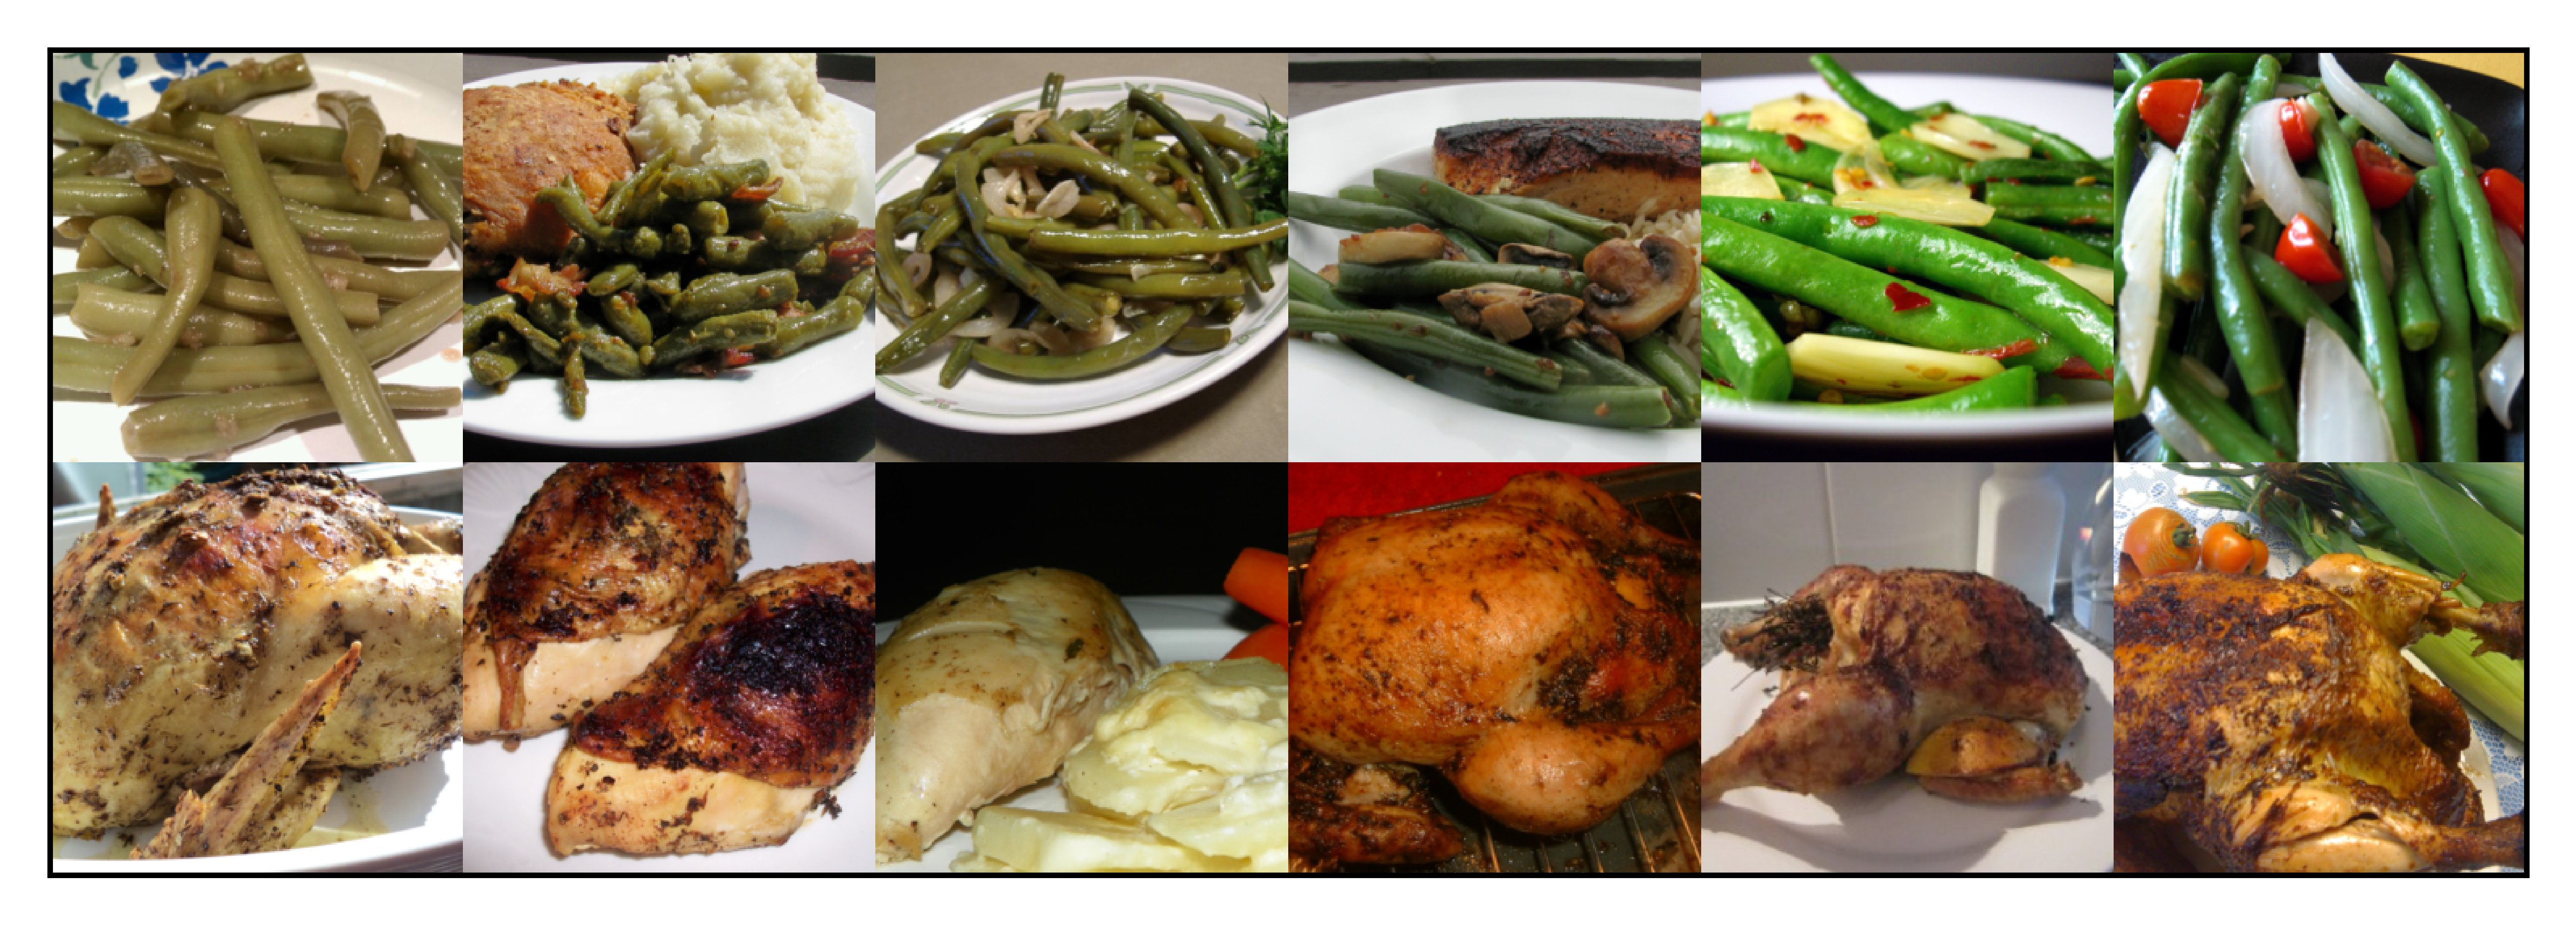

In [6]:
from random import choice, choices

index = 3
img_dir = '/srv/datasets2/recipe1m+/raw_htmls'
scale_size = 256
crop_size = 256
transform = transforms.Compose([
            transforms.Resize(scale_size),
            transforms.CenterCrop(crop_size),
            transforms.ToTensor(),
        ])
def get_img_from_id(recipe_id: str):
    site_map = recipe_id.split('_')[0]
    file_name = 'recipe-' + recipe_id.split('_')[1] + '.jpg'
    img_path = os.path.join(img_dir,site_map,file_name)
    img = Image.open(img_path).convert('RGB')
    img = transform(img)
    return img

rand_recipe_ids = choices(list(im2recipe_dict_ht.keys()),k=2)
#ht
plt.figure(dpi=1000)
ht_results = []
all_imgs = []
for recipe_id in rand_recipe_ids:
    imgs = []
    first_img = get_img_from_id(recipe_id)
    imgs.append(first_img)
    results = im2recipe_dict_ht[recipe_id]
    ht_results.append(results)
    for result in results[:5]:
        img = get_img_from_id(result)
        imgs.append(img)
    all_results_img = torch.cat(imgs,dim=2)
    all_imgs.append(all_results_img)
all_imgs_tensor = torch.cat(all_imgs,dim=1)
plt.xticks([])
plt.yticks([])
plt.imshow(all_imgs_tensor.permute(1,2,0))
plt.savefig(f'figs/ht_{index}.png')
#ours
plt.figure(dpi=1000)
all_imgs = []
our_results = []
for recipe_id in rand_recipe_ids:
    imgs = []
    first_img = get_img_from_id(recipe_id)
    imgs.append(first_img)
    results = im2recipe_dict_ours[recipe_id]
    our_results.append(results)
    for result in results[:5]:
        img = get_img_from_id(result)
        imgs.append(img)
    all_results_img = torch.cat(imgs,dim=2)
    all_imgs.append(all_results_img)
all_imgs_tensor = torch.cat(all_imgs,dim=1)
plt.xticks([])
plt.yticks([])
plt.imshow(all_imgs_tensor.permute(1,2,0))
plt.savefig(f'figs/ours_{index}.png')
print(rand_recipe_ids)
print('ht')
print(ht_results)
print('ours')
print(our_results)

In [6]:
gts = {}
hts = {}
ours = {}
for i, gt_recipe_id in enumerate(rand_recipe_ids):
    gts[gt_recipe_id] = nutr_g_per_recipes[gt_recipe_id]
    ht_pred = {}
    for ht_recipe_id in ht_results[i]:
        ht_pred[ht_recipe_id] = nutr_g_per_recipes[ht_recipe_id]
    hts[gt_recipe_id] = ht_pred
    our_pred = {}
    for our_recipe_id in our_results[i]:
        our_pred[our_recipe_id] = nutr_g_per_recipes[our_recipe_id]
    ours[gt_recipe_id] = our_pred

In [7]:
nutr_names = [
    'energy',
    'fat',
    'carb',
    'protein',
]
mads = {'energy': 1395.8724423387391,
 'fat': 81.84545318660784,
 'carb': 191.63350253321084,
 'protein': 58.820853333231774
}

for gt_recipe_id in rand_recipe_ids:
    #ht
    print('ht')
    ase_list = []
    for ht_recipe_id in hts[gt_recipe_id].keys():
        ase = 0.
        for nutr_name in nutr_names:
            absolute_error = abs(hts[gt_recipe_id][ht_recipe_id][nutr_name] - gts[recipe_id][nutr_name])
            nutr_ase = absolute_error / mads[nutr_name]
            ase += nutr_ase
        ase_list.append(ase)
    print(ase_list)
    #our
    print('ours')
    ase_list = []
    for our_recipe_id in ours[gt_recipe_id].keys():
        ase = 0.
        for nutr_name in nutr_names:
            absolute_error = abs(ours[gt_recipe_id][our_recipe_id][nutr_name] - gts[recipe_id][nutr_name])
            nutr_ase = absolute_error / mads[nutr_name]
            ase += nutr_ase
        ase_list.append(ase)
    print(ase_list)

ht
[0.4710409477037306, 0.5525009963754574, 0.6039880098254224, 0.6149603952968636, 0.626910015749275, 0.48330950654870397, 0.421711995598969, 0.33826988307618855, 0.48485920960892737, 0.553132269605421, 0.45773493791152525, 0.42549606195471545, 0.5091055223380121, 0.5185248309293314, 0.5230984011520059, 0.4249728427736955, 0.4488765554193524, 0.6572147210295222, 0.48757467912297325, 0.43612937506181476]
ours
[0.5786824957943085, 0.514309396499537, 0.40929623529813597, 0.46851032075258764, 0.5168908714717424, 0.48330950654870397, 0.4333744838147344, 0.5453496862249447, 0.4956266190786506, 0.5196462539404063, 0.5633441871085703, 0.45940281295331414, 0.5525009963754574, 0.626910015749275, 0.5091055223380121, 0.6039880098254224, 0.421711995598969, 0.35575958033935495, 0.48202015564465767, 0.5364014061939242]
ht
[0.0772711736420438, 0.19693347815698098, 0.15338017415675798, 0.17959317890551593, 0.2016366648484189, 0.21224828996258654, 0.2545693306489769, 0.09294109095462545, 0.165930858768

In [8]:
with open(f'figs/ht_ids_{index}.json','w') as f:
    json.dump(ht_results,f,indent=2)
with open(f'figs/ours_ids_{index}.json','w') as f:
    json.dump(our_results,f,indent=2)
with open(f'figs/gt_ids_{index}.json','w') as f:
    json.dump(rand_recipe_ids,f,indent=2)
with open(f'figs/hts_{index}.json','w') as f:
    json.dump(hts,f,indent=2)
with open(f'figs/ours_{index}.json','w') as f:
    json.dump(ours,f,indent=2)
with open(f'figs/gts_{index}.json','w') as f:
    json.dump(gts,f,indent=2)